Implementing K-Means Clustering
Task: Apply K-Means clustering to the Iris dataset and visualize the clusters using a scatter plot of two features. Evaluate the clustering by comparing it to the actual species labels.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


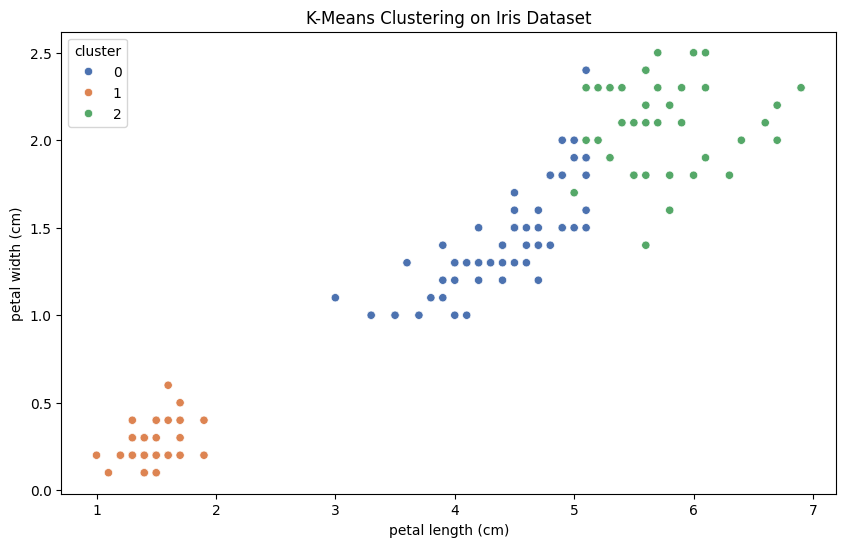

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df.iloc[:, :-1])

# Scatter plot of petal length and petal width
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='cluster', palette='deep')
plt.title('K-Means Clustering on Iris Dataset')
plt.show()


Choosing the Optimal Number of Clusters
Task: Use the Elbow Method and Silhouette Score to determine the optimal number of clusters for the Iris dataset. Visualize the Silhouette Score for different cluster counts.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

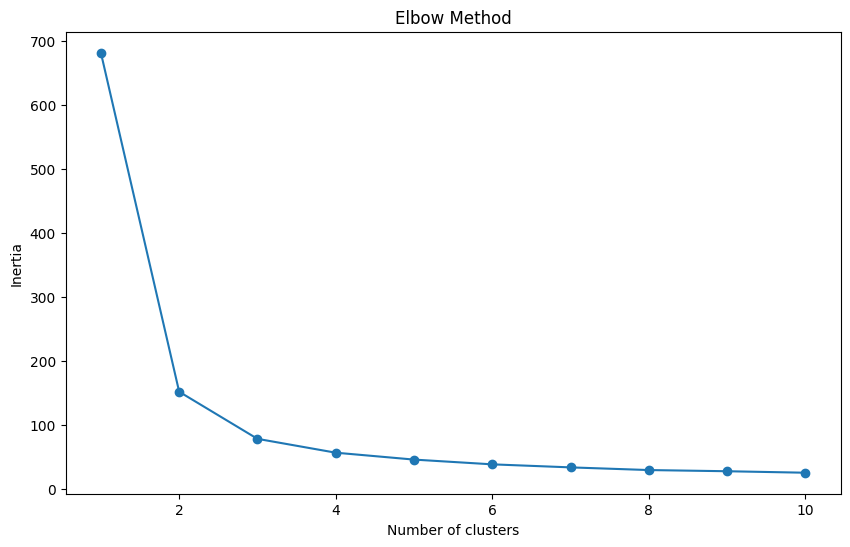

In [2]:
from sklearn.metrics import silhouette_score

# Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df.iloc[:, :-2])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

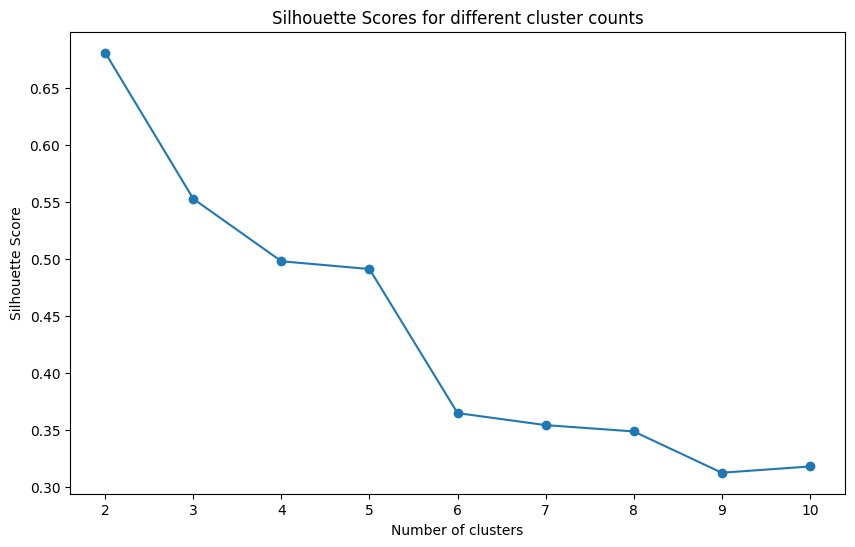

In [3]:
# Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df.iloc[:, :-2])
    silhouette_scores.append(silhouette_score(df.iloc[:, :-2], cluster_labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for different cluster counts')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


Cluster Visualization with PCA
Task: Use Principal Component Analysis (PCA) to reduce the Iris dataset to two dimensions. Visualize the clusters obtained from K-Means clustering in the PCA-reduced space.


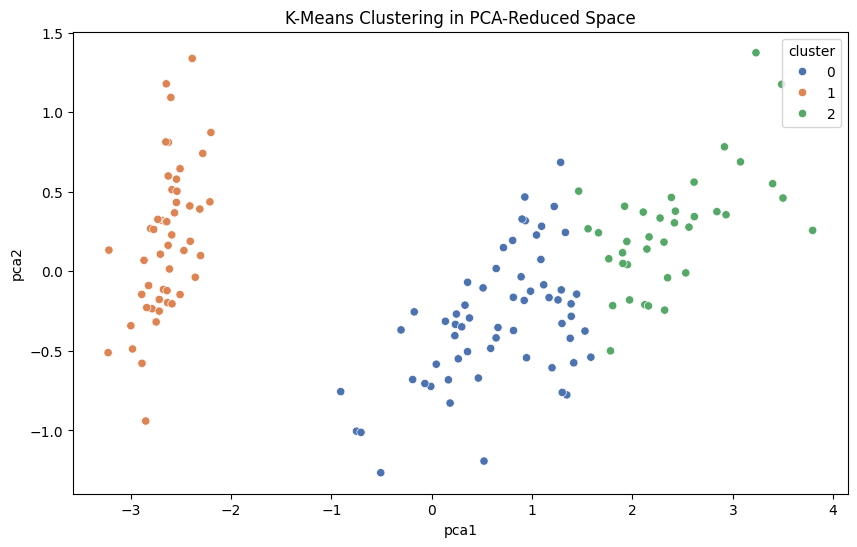

In [4]:
from sklearn.decomposition import PCA

# PCA reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.iloc[:, :-2])
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

# Scatter plot in PCA-reduced space
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='deep')
plt.title('K-Means Clustering in PCA-Reduced Space')
plt.show()


Hierarchical Clustering: Dendrogram
Task: Implement hierarchical clustering using the Iris dataset. Plot a dendrogram to visualize the clustering process and choose an appropriate number of clusters.


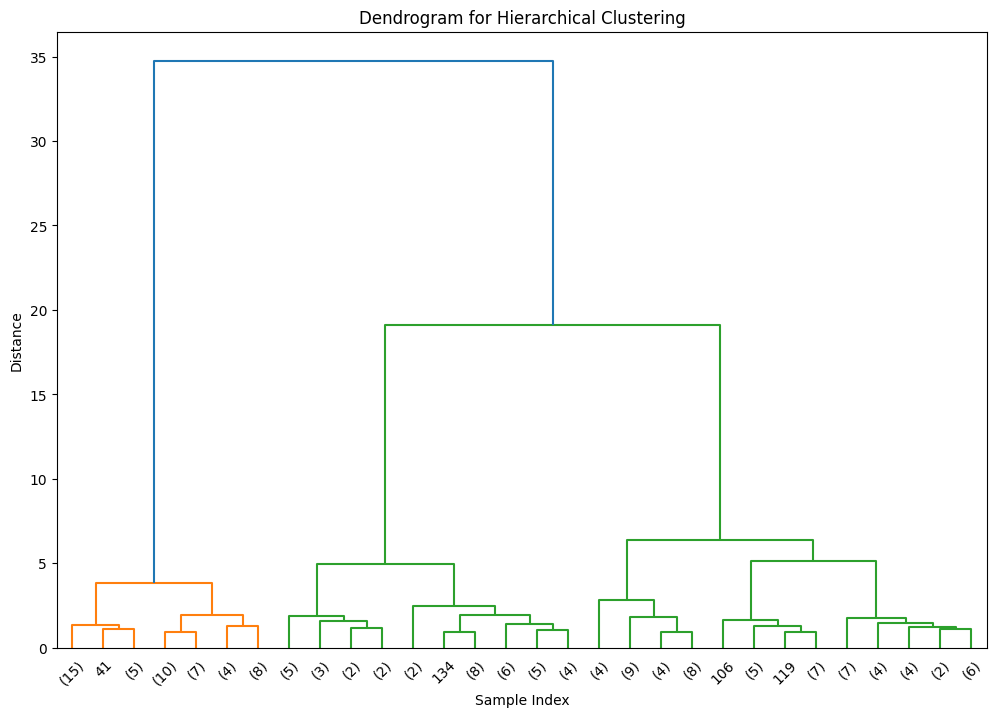

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Hierarchical clustering
linked = linkage(df.iloc[:, :-2], 'ward')

plt.figure(figsize=(12, 8))
dendrogram(linked, labels=df.index, truncate_mode='lastp', p=30)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


Comparing Clustering Algorithms
Task: Compare the performance of K-Means and Agglomerative Hierarchical Clustering on the Iris dataset. Discuss the strengths and weaknesses of each approach based on the results.


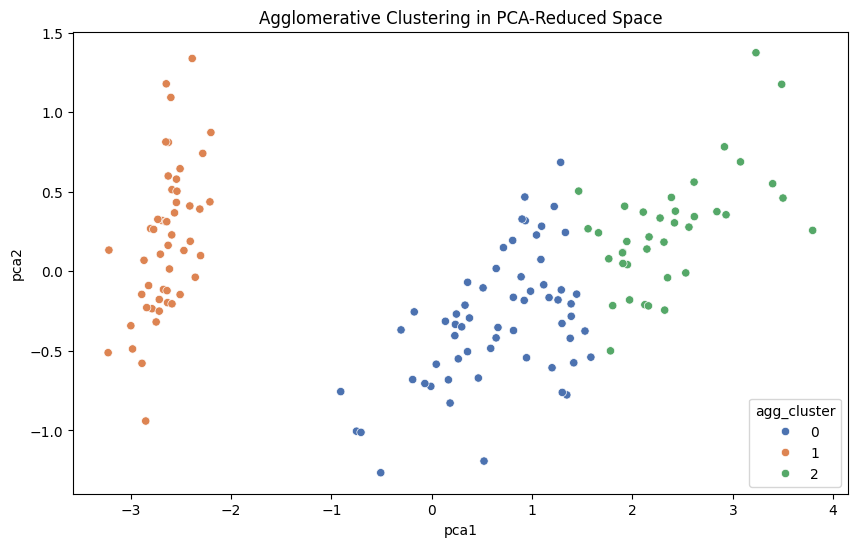

Strengths and weaknesses of K-Means and Agglomerative Hierarchical Clustering:
K-Means:
Strengths: Efficient, works well with spherical clusters, easy to implement.
Weaknesses: Requires specifying the number of clusters, sensitive to initial centroids, may not perform well with non-spherical clusters.

Agglomerative Hierarchical Clustering:
Strengths: Does not require specifying the number of clusters, produces a dendrogram for visualization, can handle various shapes of clusters.
Weaknesses: Computationally intensive for large datasets, may produce imbalanced clusters, difficult to determine the optimal number of clusters from the dendrogram.


In [6]:
from sklearn.cluster import AgglomerativeClustering

# Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
df['agg_cluster'] = agg_cluster.fit_predict(df.iloc[:, :-2])

# Compare the clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='agg_cluster', palette='deep')
plt.title('Agglomerative Clustering in PCA-Reduced Space')
plt.show()

# Discussion of strengths and weaknesses
print("Strengths and weaknesses of K-Means and Agglomerative Hierarchical Clustering:")
print("K-Means:")
print("Strengths: Efficient, works well with spherical clusters, easy to implement.")
print("Weaknesses: Requires specifying the number of clusters, sensitive to initial centroids, may not perform well with non-spherical clusters.")
print("\nAgglomerative Hierarchical Clustering:")
print("Strengths: Does not require specifying the number of clusters, produces a dendrogram for visualization, can handle various shapes of clusters.")
print("Weaknesses: Computationally intensive for large datasets, may produce imbalanced clusters, difficult to determine the optimal number of clusters from the dendrogram.")
